## Preparation

In [26]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections as cl
import math
import numpy as np

## Sensitivity Analysis Parameter

## Read results from CSV files

### determine the variable for investigation

### Declare important variables:
Using a List for important variables such as:
* Electricity Tariff
* Budget Deficit
* Utility Energy Sale
* Consumer Numbers
    1. Regular Consumers
    2. Prosumers
    3. Defectors 
    4. Total
* Monthly Average Demand
    1. Regular Consumers
    2. Prosumers

In [30]:
important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','NPV PV','Total Consumers','Defectors','Regular Consumers','Prosumers','Regular Consumer Average Demand', 'Prosumer Average Demand']
# important_vars=['Electricity Tariff','Budget Deficit', 'Utility Energy Sale','Total Consumers','Defectors','Regular Consumers','Prosumers']

In [31]:
directoryPath = Path.cwd().joinpath('Outputs')
sensitivity_var='period'
[float(s.stem.split('_')[1]) for s in directoryPath.glob(f'{sensitivity_var}_*.csv')]

[1.0, 12.0, 18.0, 24.0, 3.0, 30.0, 36.0, 6.0]

In [32]:
select_result={v:pd.DataFrame() for v in important_vars} 
for s in directoryPath.glob(f'{sensitivity_var}_*.csv'):
    sv = float(s.stem.split('_')[1])
    result=pd.read_csv(s,squeeze=True,index_col=0,dtype='float64')
    for v in important_vars:
        select_result[v][sv]=result[v]

In [33]:
    for v in important_vars:
        select_result[v].sort_index(axis=1,inplace=True)

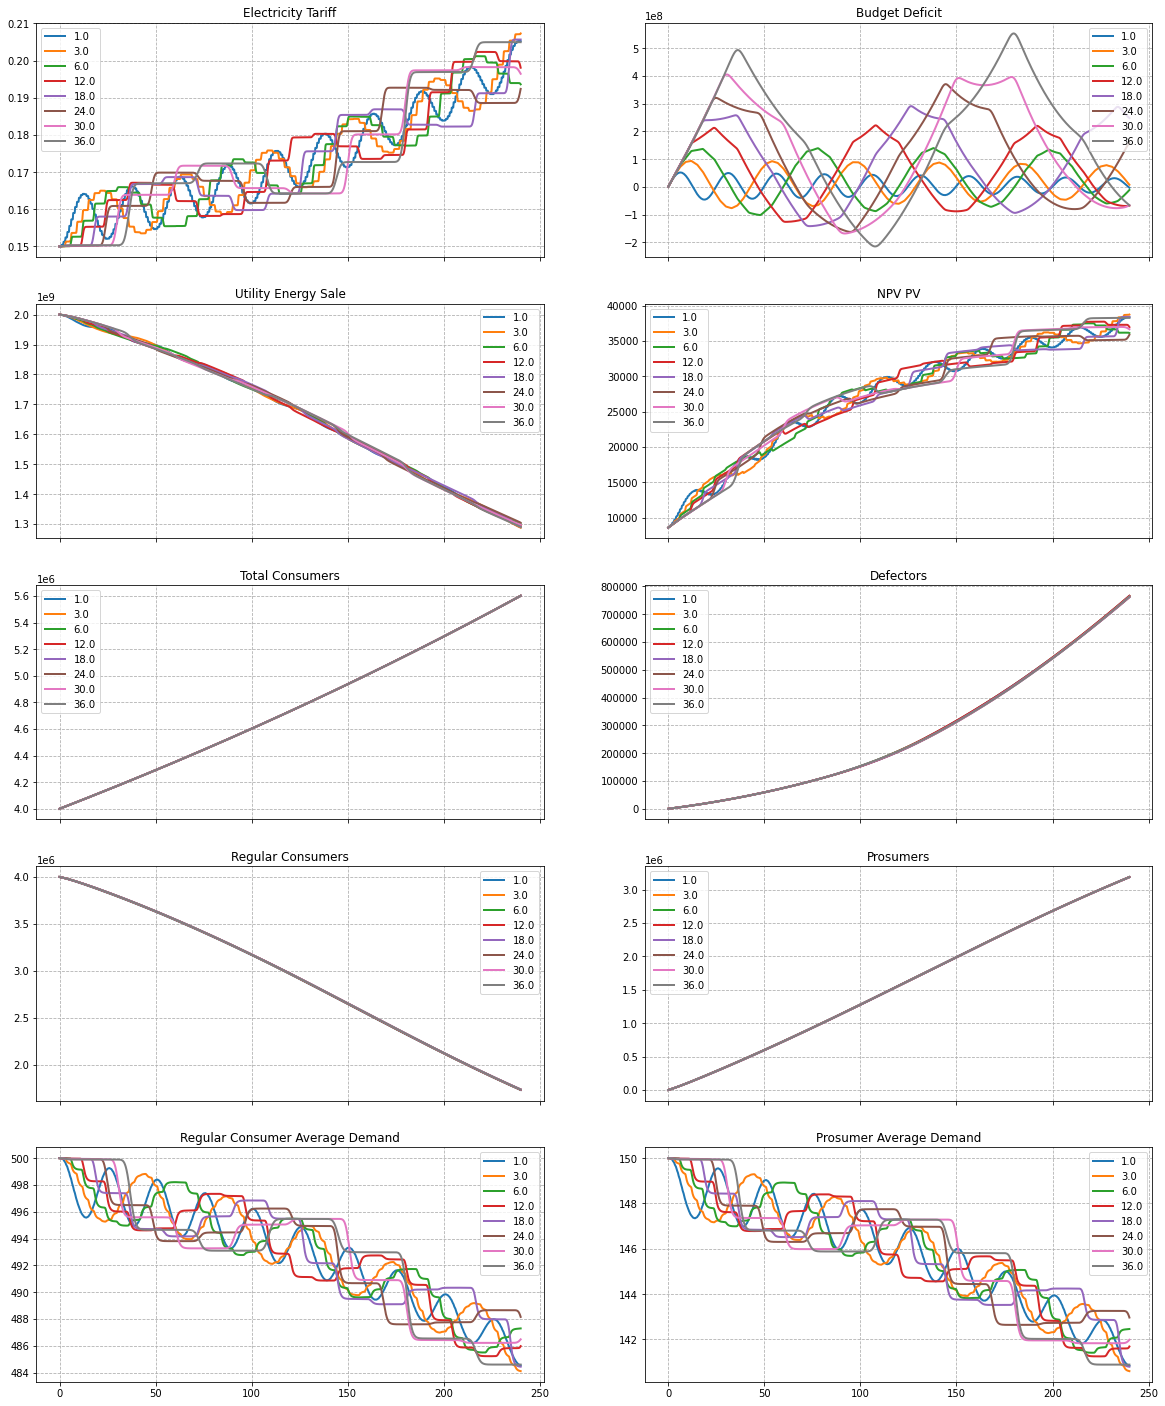

In [34]:
mpl.rc('lines',linewidth=2)  
n_rows= math.ceil(len(important_vars)/2)
fig,ax =plt.subplots(n_rows,2,sharex=True)
fig.set_size_inches(20,n_rows*5)
for i,v in enumerate(important_vars):
    cur_ax=ax[i//2,i%2]
    select_result[v].plot(ax=cur_ax)
    # select_result[v].loc[240].plot(ax=cur_ax)
    cur_ax.grid(True,linestyle='--')
    cur_ax.title.set_text(v)
    # if i in [0,1,3]:
    #     cur_ax.set_yscale('symlog')

<AxesSubplot:>

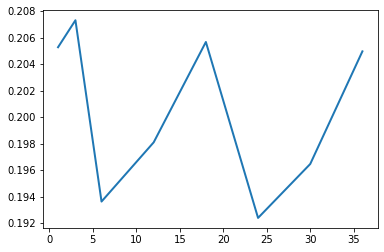

In [35]:
select_result['Electricity Tariff'].loc[240].plot()

## Differentiating the price time series